In [1]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D 
import tensorflow.keras.utils as ut 

In [2]:
#loading the dataset 
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape((X_train.shape[0],28,28,1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0],28,28,1)).astype('float32')

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
y_train = ut.to_categorical(y_train, 10)
y_test = ut.to_categorical(y_test, 10)
num_classes = y_test.shape[1]

In [6]:
#defining the Model 
def large_model():
    model = Sequential()
    model.add(Conv2D(30,(5,5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(15,(3,3), activation = 'relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(50,activation ='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    #compiling the model
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model

In [7]:
model=large_model()

In [8]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200)


Epoch 1/10
300/300 [==============================] - 14s 45ms/step - loss: 0.3786 - accuracy: 0.8848 - val_loss: 0.0963 - val_accuracy: 0.9710
Epoch 2/10
300/300 [==============================] - 13s 44ms/step - loss: 0.0979 - accuracy: 0.9704 - val_loss: 0.0516 - val_accuracy: 0.9829
Epoch 3/10
300/300 [==============================] - 13s 44ms/step - loss: 0.0703 - accuracy: 0.9785 - val_loss: 0.0383 - val_accuracy: 0.9882
Epoch 4/10
300/300 [==============================] - 11s 37ms/step - loss: 0.0583 - accuracy: 0.9818 - val_loss: 0.0386 - val_accuracy: 0.9877
Epoch 5/10
300/300 [==============================] - 12s 39ms/step - loss: 0.0494 - accuracy: 0.9854 - val_loss: 0.0292 - val_accuracy: 0.9911
Epoch 6/10
300/300 [==============================] - 13s 43ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0265 - val_accuracy: 0.9914
Epoch 7/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0281 - val_accuracy:

In [9]:
scores = model.evaluate(X_test,y_test, verbose=2)

313/313 - 2s - loss: 0.0246 - accuracy: 0.9925 - 2s/epoch - 5ms/step


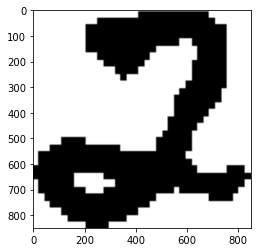

In [10]:
import requests
from PIL import Image
import matplotlib.pyplot as plt

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(28, 28, 4)
(28, 28)


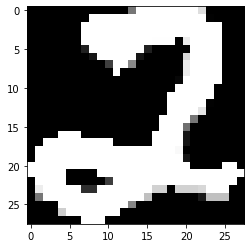

In [11]:
import cv2
import numpy as np

a_image = np.asarray(img)
resized_img = cv2.resize(a_image,(28,28))
print(resized_img.shape)
gray_img = cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)
print(gray_img.shape)
image = cv2.bitwise_not(gray_img)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [12]:
import numpy as np 
image = image/255
image = image.reshape(1, 784)

prediction = np.argmax(model.predict(image), axis=-1)
print("predicted digit:", str(prediction))

ValueError: in user code:

    File "C:\Users\ompra\Anaconda3\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\ompra\Anaconda3\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ompra\Anaconda3\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\ompra\Anaconda3\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\ompra\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ompra\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 784)
